# Use recipe dataset to train word2vec model for recipes

In [181]:
import pandas as pd

df = pd.read_csv('RAW_recipes.csv')
df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


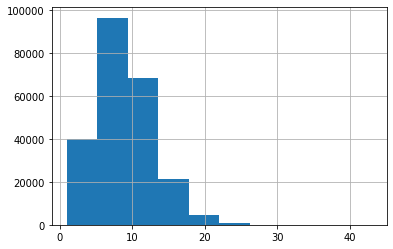

In [182]:
df['n_ingredients'].hist()

In [183]:
df.describe()

,id,minutes,contributor_id,n_steps,n_ingredients
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000


In [82]:
ingredients = df['ingredients']
ingredients

0         ['winter squash', 'mexican seasoning', 'mixed ...
1         ['prepared pizza crust', 'sausage patty', 'egg...
2         ['ground beef', 'yellow onions', 'diced tomato...
3         ['spreadable cheese with garlic and herbs', 'n...
4         ['tomato juice', 'apple cider vinegar', 'sugar...
                                ...                        
231632    ['celery', 'onion', 'green sweet pepper', 'gar...
231633    ['paprika', 'salt', 'garlic powder', 'onion po...
231634    ['hard-cooked eggs', 'mayonnaise', 'dijon must...
231635    ['butter', 'eagle brand condensed milk', 'ligh...
231636    ['granulated sugar', 'shortening', 'eggs', 'fl...
Name: ingredients, Length: 231637, dtype: object

### Change ingredient string to list

In [83]:
for i in range(len(df)):
    temp = eval(df.loc[i,'ingredients'] )
    df.at[i,'ingredients'] = temp

### Unique ingredients

In [84]:
s = set()

for i in range(len(df)):
    for j in range(len(df.loc[i,'ingredients'])):
        s.add(df.loc[i,'ingredients'][j])

In [85]:
len(s)

14942

### Put into sentences

In [88]:
sentences = df['ingredients'].to_list()

In [89]:
for i in sentences:
    for j in i:
        if j == 'egg roll wrappers':
            print(i)

['ricotta cheese', 'cream cheese', 'fresh basil', 'garlic salt', 'seasoned pepper', 'egg', 'mozzarella cheese', 'parmesan cheese', 'pasta sauce', 'egg roll wrappers', 'frozen italian style meatballs']


In [90]:
sentences

[['winter squash',
  'mexican seasoning',
  'mixed spice',
  'honey',
  'butter',
  'olive oil',
  'salt'],
 ['prepared pizza crust',
  'sausage patty',
  'eggs',
  'milk',
  'salt and pepper',
  'cheese'],
 ['ground beef',
  'yellow onions',
  'diced tomatoes',
  'tomato paste',
  'tomato soup',
  'rotel tomatoes',
  'kidney beans',
  'water',
  'chili powder',
  'ground cumin',
  'salt',
  'lettuce',
  'cheddar cheese'],
 ['spreadable cheese with garlic and herbs',
  'new potatoes',
  'shallots',
  'parsley',
  'tarragon',
  'olive oil',
  'red wine vinegar',
  'salt',
  'pepper',
  'red bell pepper',
  'yellow bell pepper'],
 ['tomato juice',
  'apple cider vinegar',
  'sugar',
  'salt',
  'pepper',
  'clove oil',
  'cinnamon oil',
  'dry mustard'],
 ['milk', 'vanilla ice cream', 'frozen apple juice concentrate', 'apple'],
 ['fennel seeds',
  'green olives',
  'ripe olives',
  'garlic',
  'peppercorn',
  'orange rind',
  'orange juice',
  'red chile',
  'extra virgin olive oil'],
 [

### Train word2vec model

In [91]:
import gensim
from gensim.models import Word2Vec

model = Word2Vec(sentences, window = 15, min_count = 2, size = 300)
model.train(sentences, total_examples=model.corpus_count, epochs=30, report_delay=1)

### Save model

In [1]:
import pickle
pickle.dump(model, open('food2vec.pkl','wb'))

### Load model

In [185]:
model = pickle.load(open('food2vec.pkl', 'rb'))

# Map ingredients from database to ingredients in model
## Train another word2vec model using the ingredients from database

In [187]:
import mysql.connector
db = mysql.connector.connect(host='localhost',user='root',password='root', database='food_recommendation')

In [188]:
c = db.cursor()
c.execute("""
SELECT ingredient_name FROM ingredients

""")

In [189]:
l = [i[0] for i in c]

In [190]:
l = set(l)

In [191]:
l-s

{'0% fat greek yogurt',
 '5 spice powder',
 '85 percent ground beef',
 '93% lean ground turkey meat',
 'Crema Mexicana',
 'Low Moisture Part-Skim Mozzarella Cheese',
 'Miso Soybean Paste',
 'Potato Starch Flour',
 'Short Dough Tartlets',
 'Spice Rub',
 'acai juice',
 'acini di pepe',
 'active yeast',
 'aged balsamic vinegar',
 'aji amarillo paste',
 'alcohol free vanilla flavor',
 'alo drink',
 'amla',
 'anaheim chiles',
 'ancho chile powder',
 'angel hair',
 'arrowroot powder',
 'asafoetida',
 'asiago',
 'asian dressing',
 'asian vegetables',
 'baby-back ribs',
 'bbq sauce',
 'bbq seasoning',
 'beef chuck roast',
 'beef round roast',
 'beef top sirloin steak',
 'beet greens',
 'bibb lettuce leaves',
 'black cardamoms',
 'black cod',
 'black quinoa',
 'bleu cheese dressing',
 'blood orange zest',
 'blue cheese crumbles',
 'bone in pork chops',
 'bone in pork roast',
 'bone in skin on chicken breasts',
 'bone-in chicken thighs',
 'bottle gourd',
 'bottled ginger',
 'brats',
 'brioche bu

### Get recipe ingredients

In [240]:
recipe_ingredients = pd.read_sql(("""
SELECT ri.recipe_id, r.recipe_name, i.ingredient_name 
FROM recipe_ingredients ri
JOIN ingredients i
ON ri.ingredient_id = i.ingredient_id
JOIN recipe r
ON ri.recipe_id = r.recipe_id
ORDER BY r.recipe_id
"""), db)

In [241]:
recipe_ingredients.head(10)

,recipe_id,recipe_name,ingredient_name
0,45,"Mustard Greens, Shrimp, And Anchovy Pasta",coarse salt
1,45,"Mustard Greens, Shrimp, And Anchovy Pasta",red pepper flakes
2,45,"Mustard Greens, Shrimp, And Anchovy Pasta",macaroni
3,45,"Mustard Greens, Shrimp, And Anchovy Pasta",anchovy
4,45,"Mustard Greens, Shrimp, And Anchovy Pasta",shrimp
5,45,"Mustard Greens, Shrimp, And Anchovy Pasta",lemon juice
6,45,"Mustard Greens, Shrimp, And Anchovy Pasta",olive oil
7,45,"Mustard Greens, Shrimp, And Anchovy Pasta",mustard greens
8,405,Pan Bagnat,garlic clove
9,405,Pan Bagnat,fresh parsley


In [225]:
all_id = recipe_ingredients['recipe_id'].unique()
all_id = list(all_id )
all_id

[45,
 405,
 415,
 632,
 860,
 896,
 1071,
 1398,
 1709,
 1966,
 2170,
 2295,
 2514,
 3131,
 3642,
 4040,
 4098,
 4792,
 4923,
 5260,
 5340,
 5409,
 6438,
 6777,
 6826,
 7293,
 7549,
 7735,
 8161,
 8212,
 8261,
 8467,
 8479,
 8519,
 9444,
 10893,
 11322,
 11343,
 11492,
 11497,
 12011,
 12130,
 12225,
 12264,
 12330,
 12526,
 12739,
 12819,
 13392,
 13568,
 14189,
 14299,
 14387,
 14408,
 15219,
 15245,
 15337,
 15353,
 15921,
 16179,
 16201,
 16253,
 16559,
 16626,
 16720,
 16976,
 17790,
 17972,
 18609,
 18827,
 18840,
 19274,
 19341,
 19477,
 19562,
 21051,
 21076,
 21106,
 21166,
 21473,
 21563,
 21741,
 22018,
 22105,
 22495,
 22588,
 22817,
 22831,
 23306,
 23326,
 23374,
 23658,
 23678,
 24558,
 25133,
 25243,
 25245,
 25367,
 25384,
 25525,
 25588,
 26002,
 26341,
 26460,
 26851,
 27278,
 27328,
 27946,
 27988,
 28241,
 28655,
 28678,
 28897,
 28949,
 29177,
 29246,
 29802,
 29901,
 30217,
 30472,
 30679,
 31584,
 31630,
 31701,
 32054,
 32441,
 32590,
 32660,
 32865,
 33102,
 3

In [245]:
len(all_id)

3431

In [246]:
len(recipe_ingredients['recipe_id'].unique())

3431

In [250]:
name = []
for i in all_id:
    name.append(recipe_ingredients[recipe_ingredients['recipe_id']==i]['recipe_name'].iloc[0])

In [252]:
len(name)

3431

### Concat ingredients

In [254]:
recipe_ingredients = pd.DataFrame(recipe_ingredients.groupby('recipe_id')['ingredient_name'].transform(lambda x: ','.join(x)).drop_duplicates())
recipe_ingredients

,ingredient_name
0,"coarse salt,red pepper flakes,macaroni,anchovy..."
8,"garlic clove,fresh parsley,olives,fresh green ..."
21,"tomato,arugula,anchovy,avocado,chives,low fat ..."
36,"romaine hearts,rustic bread,bell pepper,garlic..."
47,"capers,olive oil,shallots,spinach,striped bass..."
...,...
33128,"vanilla,strawberries,salt,butter,milk,eggs,bak..."
33138,"chicken sausage,spinach,broccoli,butter,eggs,g..."
33144,"milk,eggs,salt,vanilla,maple syrup,oat flour,h..."
33153,"vanilla,sukrin sweetener,cinnamon,chia seeds,c..."


In [255]:
not_in_model = list(l-s)
not_in_model

['brioche buns',
 'morel mushrooms',
 'tofu skin',
 'acini di pepe',
 'skinless chicken parts',
 'shredded mozzarella cheese',
 'nilla wafers',
 'sticks celery',
 'oil cured black olives',
 'low fat cheese',
 'whole cranberry sauce',
 'plum vinegar',
 'baby-back ribs',
 'sherry',
 'sweet pickle juice from the jar',
 'waxy potatoes',
 'syrah',
 'madeira',
 'jerk seasoning',
 'stick margarine',
 'tamarind',
 'rooibos',
 'skinless boneless chicken thighs',
 'low fat natural yogurt',
 'moong dal',
 'brown mustard seed',
 'gluten free flour blend',
 'sharp cheddar',
 'nonfat buttermilk',
 'cranberry juice cocktail concentrate',
 'stilton',
 'microgreens',
 'rye beer',
 'chili seasoning',
 'Crema Mexicana',
 'extra sharp cheddar cheese',
 'tube polenta',
 'brats',
 'masa flour',
 'asafoetida',
 'bleu cheese dressing',
 'cow pea',
 'shredded chicken',
 'chipotle puree',
 'malunggay leaves',
 'lean lamb loin chops',
 'no calorie sweetener',
 'burrito size tortilla',
 'soy milk',
 'kraft single

### Remove ingredients that cannot be found in recipe dataset

In [259]:
for i in recipe_ingredients.index:
    temp = recipe_ingredients.loc[i, 'ingredient_name'].split(',')
    recipe_ingredients.at[i, 'ingredient_name'] = temp

In [260]:
for i in recipe_ingredients.index:
    temp = recipe_ingredients.loc[i, 'ingredient_name']
    
    for j in range(len(temp)-1,-1,-1):
        if temp[j] in not_in_model:
            temp.pop(j)
        
    recipe_ingredients.at[i, 'ingredient_name'] = temp

In [261]:
recipe_ingredients

,ingredient_name
0,"[coarse salt, red pepper flakes, macaroni, anc..."
8,"[garlic clove, fresh parsley, olives, fresh gr..."
21,"[arugula, anchovy, avocado, chives, cucumber, ..."
36,"[bell pepper, garlic clove, anchovy, parmesan ..."
47,"[capers, olive oil, shallots, spinach, striped..."
...,...
33128,"[vanilla, strawberries, salt, butter, milk, eg..."
33138,"[chicken sausage, spinach, broccoli, butter, e..."
33144,"[milk, eggs, salt, vanilla, maple syrup, oat f..."
33153,"[vanilla, cinnamon, chia seeds, coconut milk]"


In [263]:
recipe_ingredients['recipe_name'] = name

### Aggregate food ingredient embeddings into recipe embedding

In [267]:
recipe_doc_embedding = []
for i in recipe_ingredients.index:
    try:
        emb = model[recipe_ingredients.loc[i, 'ingredient_name'][0]]
        emb.flags.writeable = True
    except:
        recipe_doc_embedding.append(None)
        continue
    
    try:
        for j in range(1,len(recipe_ingredients.loc[i, 'ingredient_name'])):
            temp = model[recipe_ingredients.loc[i, 'ingredient_name'][j]]
            emb += temp
    except:
        recipe_doc_embedding.append(None)
        continue
    
    
    emb /= len(recipe_ingredients.loc[i, 'ingredient_name'])
    recipe_doc_embedding.append(emb)

C:\Users\joeip\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
C:\Users\joeip\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


In [268]:
count = 0
for i in range(len(recipe_doc_embedding)):
    if recipe_doc_embedding[i] is None:
        count +=1

In [270]:
recipe_ingredients

,ingredient_name,recipe_name
0,"[coarse salt, red pepper flakes, macaroni, anc...","Mustard Greens, Shrimp, And Anchovy Pasta"
8,"[garlic clove, fresh parsley, olives, fresh gr...",Pan Bagnat
21,"[arugula, anchovy, avocado, chives, cucumber, ...",Chicken Salad with Green Goddess Dressing
36,"[bell pepper, garlic clove, anchovy, parmesan ...",Dad's Caesar Salad
47,"[capers, olive oil, shallots, spinach, striped...",Striped Bass with Toasted-Shallot Vinaigrette ...
...,...,...
33128,"[vanilla, strawberries, salt, butter, milk, eg...",Strawberry Upside-Down Cake
33138,"[chicken sausage, spinach, broccoli, butter, e...",Chicken Sausage Scramble
33144,"[milk, eggs, salt, vanilla, maple syrup, oat f...",Almond Flour Waffles
33153,"[vanilla, cinnamon, chia seeds, coconut milk]",Chia Seed Pudding


In [272]:
recipe_ingredients['embedding'] = recipe_doc_embedding
recipe_ingredients

,ingredient_name,recipe_name,embedding
0,"[coarse salt, red pepper flakes, macaroni, anc...","Mustard Greens, Shrimp, And Anchovy Pasta","[-0.19770163, -0.29295728, 0.07207081, -0.2245..."
8,"[garlic clove, fresh parsley, olives, fresh gr...",Pan Bagnat,"[-0.3422397, -0.16406557, 0.097960725, -0.1609..."
21,"[arugula, anchovy, avocado, chives, cucumber, ...",Chicken Salad with Green Goddess Dressing,"[-0.16061032, 0.18311056, -0.1561118, -0.58967..."
36,"[bell pepper, garlic clove, anchovy, parmesan ...",Dad's Caesar Salad,"[-0.51636153, -0.4086953, 0.28946704, -0.93431..."
47,"[capers, olive oil, shallots, spinach, striped...",Striped Bass with Toasted-Shallot Vinaigrette ...,"[-0.27924925, -0.31529462, 0.07227694, -0.1223..."
...,...,...,...
33128,"[vanilla, strawberries, salt, butter, milk, eg...",Strawberry Upside-Down Cake,"[-0.24311839, -0.17787457, 0.047811404, -0.158..."
33138,"[chicken sausage, spinach, broccoli, butter, e...",Chicken Sausage Scramble,"[-0.174271, -0.21977353, 0.10825199, -0.247542..."
33144,"[milk, eggs, salt, vanilla, maple syrup, oat f...",Almond Flour Waffles,"[-0.26579776, -0.12247917, 0.062908575, -0.052..."
33153,"[vanilla, cinnamon, chia seeds, coconut milk]",Chia Seed Pudding,"[-0.24311839, -0.17787457, 0.047811404, -0.158..."


In [318]:
recipe_ingredients = recipe_ingredients[~recipe_ingredients['embedding'].isnull()]
recipe_ingredients.drop_duplicates(subset = 'recipe_name', keep = 'first', inplace = True)

C:\Users\joeip\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [319]:
recipe_ingredients.set_index(recipe_ingredients['recipe_name'], inplace = True)

# Calculate cosine similarity between recipes

In [323]:
from scipy import spatial
consine_sim_df = pd.DataFrame(index = recipe_ingredients['recipe_name'], columns = recipe_ingredients['recipe_name'])
consine_sim_df.fillna(float('inf'), inplace = True)

In [324]:
consine_sim_df

recipe_name,"Mustard Greens, Shrimp, And Anchovy Pasta",Pan Bagnat,Chicken Salad with Green Goddess Dressing,Dad's Caesar Salad,Striped Bass with Toasted-Shallot Vinaigrette and Spinach,Striped Sea Bass With Blood Oranges And Olives,Cedar Plank Grilled Loup De Mer (sea Bass),Pan-Fried Skate with Brown Butter and Parsnip Puree,Salmon Fillets With Horseradish-potato Crust,Salmon with Fennel and Pernod,...,"Shredded Brussels Sprouts with Pistachios, Cranberries & Parmesan",Your New Favourite (Protein Packed) Comfort Dinner – Lentil Bolognese,Lemon Sour Cream Pie,Mango-Jalapeño Smoothie,Our Best Skillet Cookie,Strawberry Upside-Down Cake,Chicken Sausage Scramble,Almond Flour Waffles,Chia Seed Pudding,Chickpea Frittata Breakfast Sandwich
recipe_name,,,,,,,,,,,,,,,,,,,,,
"Mustard Greens, Shrimp, And Anchovy Pasta",inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
Pan Bagnat,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
Chicken Salad with Green Goddess Dressing,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
Dad's Caesar Salad,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
Striped Bass with Toasted-Shallot Vinaigrette and Spinach,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Strawberry Upside-Down Cake,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
Chicken Sausage Scramble,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
Almond Flour Waffles,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [326]:
for i in consine_sim_df.index:
    for j in consine_sim_df.index:
        consine_sim_df.loc[i,j] = spatial.distance.cosine(recipe_ingredients.loc[i,'embedding'], recipe_ingredients.loc[j,'embedding'])

In [328]:
# save cosine similarity to csv
consine_sim_df.to_csv('cosine_sim.csv')

In [329]:
consine_sim_df

recipe_name,"Mustard Greens, Shrimp, And Anchovy Pasta",Pan Bagnat,Chicken Salad with Green Goddess Dressing,Dad's Caesar Salad,Striped Bass with Toasted-Shallot Vinaigrette and Spinach,Striped Sea Bass With Blood Oranges And Olives,Cedar Plank Grilled Loup De Mer (sea Bass),Pan-Fried Skate with Brown Butter and Parsnip Puree,Salmon Fillets With Horseradish-potato Crust,Salmon with Fennel and Pernod,...,"Shredded Brussels Sprouts with Pistachios, Cranberries & Parmesan",Your New Favourite (Protein Packed) Comfort Dinner – Lentil Bolognese,Lemon Sour Cream Pie,Mango-Jalapeño Smoothie,Our Best Skillet Cookie,Strawberry Upside-Down Cake,Chicken Sausage Scramble,Almond Flour Waffles,Chia Seed Pudding,Chickpea Frittata Breakfast Sandwich
recipe_name,,,,,,,,,,,,,,,,,,,,,
"Mustard Greens, Shrimp, And Anchovy Pasta",0.000000,0.207460,0.521515,0.313502,0.277459,0.000000,0.054675,0.188989,0.166386,0.173073,...,0.079907,0.095776,0.561245,0.063933,0.072998,0.189588,0.076801,0.405027,0.189588,0.563435
Pan Bagnat,0.207460,0.000000,0.535604,0.357363,0.423443,0.207460,0.128077,0.283974,0.326536,0.275448,...,0.243902,0.210283,0.575944,0.254601,0.208719,0.360917,0.223711,0.457970,0.360917,0.636828
Chicken Salad with Green Goddess Dressing,0.521515,0.535604,0.000000,0.636606,0.495974,0.521515,0.458702,0.592452,0.537625,0.483703,...,0.489586,0.440025,0.772239,0.467877,0.537907,0.596815,0.485160,0.676934,0.596815,0.831359
Dad's Caesar Salad,0.313502,0.357363,0.636606,0.000000,0.558128,0.313502,0.294512,0.487653,0.466902,0.486226,...,0.370674,0.367132,0.697952,0.396898,0.398625,0.544243,0.374489,0.644482,0.544243,0.592949
Striped Bass with Toasted-Shallot Vinaigrette and Spinach,0.277459,0.423443,0.495974,0.558128,0.000000,0.277459,0.299038,0.369908,0.336091,0.404798,...,0.321194,0.251139,0.671429,0.262343,0.336426,0.431404,0.279712,0.539177,0.431404,0.647556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Strawberry Upside-Down Cake,0.189588,0.360917,0.596815,0.544243,0.431404,0.189588,0.171174,0.304081,0.236797,0.241792,...,0.114226,0.231914,0.365745,0.108349,0.101092,0.000000,0.134634,0.219452,0.000000,0.632139
Chicken Sausage Scramble,0.076801,0.223711,0.485160,0.374489,0.279712,0.076801,0.047300,0.160963,0.102704,0.137110,...,0.058759,0.079922,0.357514,0.030532,0.038009,0.134634,0.000000,0.298408,0.134634,0.509691
Almond Flour Waffles,0.405027,0.457970,0.676934,0.644482,0.539177,0.405027,0.324101,0.467020,0.441255,0.396096,...,0.258784,0.424968,0.270176,0.309525,0.242484,0.219452,0.298408,0.000000,0.219452,0.663945


In [332]:
consine_sim_df['Our Best Skillet Cookie'].sort_values().head(20)

recipe_name
Zucchini Banana Bread – NO Flour Required                             0.000000
Carrot Cake Oatmeal Cookies                                           0.000000
Slow Cooker Baked Apples                                              0.000000
Jennifer                                                              0.000000
Soft + Chewy Sugar-Free Baked Granola Bars                            0.000000
Our Best Skillet Cookie                                               0.000000
Sugar Free Granola                                                    0.000000
Peanut Butter-Oat Bars                                                0.000000
Baked Oatmeal Donuts For Breakfast                                    0.000000
Raspberry Almond Crumble Tart                                         0.000000
Crispy & Chewy Chocolate Chip Oat Cookies                             0.000000
Honey Nut and Oat Granola Bars                                        0.000000
Banana Oatmeal Chocolate Muffins        

In [333]:
consine_sim_df['Lemon Sour Cream Pie'].sort_values().head(20)

recipe_name
Lemon Sour Cream Pie                                        0.000000
Roasted Baby Beets                                          0.021153
Mixed Berry Phyllo Galette                                  0.021153
Divine Breadsticks                                          0.021153
KETO-CHEESECAKE MUFFINS                                     0.021153
Easy Brown Rice Risotto with Mushrooms and Fresh Oregano    0.021153
Garlic Fried Rice                                           0.021153
Grilled Leftover Ham and Pineapple Sandwiches               0.021153
Ham 'n' Swiss with a Twist                                  0.021153
Funfetti Gooey Butter Cookies                               0.021153
Raspberry White Chocolate Muffins                           0.021153
Apple Brownies                                              0.021153
Bridget Jones's Shepherd's Pie                              0.021153
Recipes At Penzeys Spices Orange Pound Cake                 0.021153
Blog Battle: Live Well

In [335]:
consine_sim_df['Almond Flour Waffles'].sort_values().head(20)

recipe_name
Start Talking About Your Struggles and Your Journey Today    0.0
Frosty Mochas                                                0.0
Giandua Souffle                                              0.0
Triple Creme Tart                                            0.0
Sunday Morning Oatmeal                                       0.0
How to Make and Freeze (Pumpkin) Toaster Waffles             0.0
Healthy Baked Steel Cut Oatmeal                              0.0
Pan Grilled Flank Steak with Soy-Mustard Sauce               0.0
Julie's Sheperd's Pie                                        0.0
Slow-Cooker Beef and Creamy Potato Casserole                 0.0
Almond Cake with Fig Filling and Maple Buttercream           0.0
Cheesy Fiesta Chicken and Rice Casserole                     0.0
Giveaway: Fluoride Detox Diet Online Class                   0.0
Raspberry Tart with a Pistachio Crust                        0.0
Stovetop Bratwurst Dinner                                    0.0
Coco Coffee S